In [240]:
import pandas as pd
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from apyori import apriori
from collections import namedtuple
import itertools

In [84]:
#df=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Market-Basket-Analysis/master/Data/store_data.csv",sep="\n",names=['Transaction'])
#print(df)
#df.to_csv('marketbasket.csv')
groceries=pd.read_csv('marketbasket.csv')

In [227]:
transactions = groceries['Transaction'].apply(lambda t: t.split(','))
transactions = list(transactions)
flattened = [i.strip() for t in transactions for i in t]
#print(flattened)
groceries2 = list(set(flattened))

# Generate all possible rules from groceries list
rules = list(permutations(groceries2, 2))

# Print the set of rules
#print(rules)

# Print the number of rules
print(len(rules))


14042


In [228]:
# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
print(onehot.head(3))


    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour  whole wheat pasta  \
0        False       False              True              False   
1        False       False             False              False   
2        False       False             False              False   

   whole wheat rice   yams  yogurt cake  zucchini  
0             False   True        False  

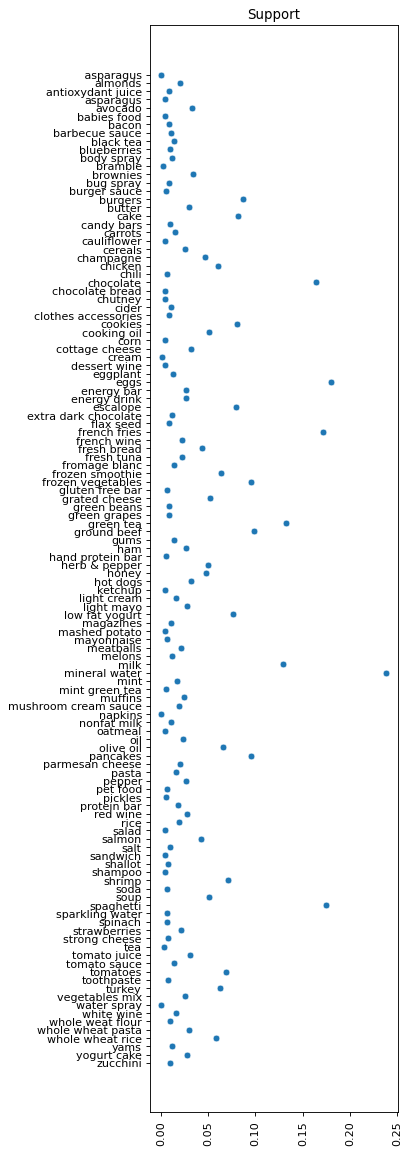

In [229]:
# Compute the support
support = onehot.mean()

# Print the support values
#print(support)
support_df=pd.Series(support)
#print(support_df.values)


#x=support_df.index
#x=np.linspace(-50,50,len(support_df))
#y=support_df.values.astype('float')*1000

#heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.clf()
#plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.show()

plt.figure(figsize=(4, 18), dpi=80)
sns.scatterplot(x=support_df.values,y=support_df.index)
plt.xticks(rotation=90)
plt.title("Support")
plt.show()

In [230]:
association_rules=apriori(transactions,min_support=0.001, min_confidence=0.7, min_lift=1.2, min_length=2)
association_results=list(association_rules)

In [231]:
print(len(association_results))

182


In [232]:
print("Confidence tells the probability we will purchase y given we have purchased x\n\n")
print("A lift >1 tell us they occur more often than we expect than based on their support values.  This means this relationship is unlikely by random chance\n\n")
print("A positive zhang number means the foods are not disassociated\n\n")
#print(association_results)

DataRecord = namedtuple("DataRecord", "foods support confidence lift leverage conviction zhang")
lstData=[]
for record in association_results:
    foods=[i for i in record.items]
    support=round(record.support,3)
    confidence=round(record.ordered_statistics[0].confidence,3)
    lift=round(record.ordered_statistics[0].lift,2)    
    dataRecord = DataRecord(foods,support,confidence,lift,0,0,0)
    lstData.append(dataRecord)
    #print("{foods} support {support} confidence {confidence} lift {lift}".format(
    #   foods=[i for i in record.items],support=round(record.support,3),
    #    confidence=round(record.ordered_statistics[0].confidence,2),lift=round(record.ordered_statistics[0].lift,2)))
    
print(lstData[:3])

Confidence tells the probability we will purchase y given we have purchased x


A lift >1 tell us they occur more often than we expect than based on their support values.  This means this relationship is unlikely by random chance


A positive zhang number means the foods are not disassociated


[DataRecord(foods=['spaghetti', 'pancakes', 'bacon'], support=0.002, confidence=0.812, lift=4.67, leverage=0, conviction=0, zhang=0), DataRecord(foods=['barbecue sauce', 'mineral water', 'chocolate'], support=0.001, confidence=0.769, lift=3.23, leverage=0, conviction=0, zhang=0), DataRecord(foods=['eggs', 'turkey', 'black tea'], support=0.001, confidence=0.733, lift=4.08, leverage=0, conviction=0, zhang=0)]


In [282]:
def get_support(antecedent,consequent):
    supportAC = np.logical_and(antecedent,consequent).mean()
    return supportAC

def get_lift(antecedent,consequent):
     #Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()
    # Compute support for antecedent
    supportA = antecedent.mean()
    # Compute support for consequent
    supportC = consequent.mean()
    # Return conviction
    return supportAC/supportA*supportC

def get_confidence(antecedent,consequent):
     #Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()
    # Compute support for antecedent
    supportA = antecedent.mean()
    # Return conviction
    return supportAC/supportA
    
def get_conviction(antecedent, consequent):
     #Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()
    # Compute support for antecedent
    supportA = antecedent.mean()
    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()
    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC
    #print(supportAnC)
    
    if supportAnC==0:
        retVal=0
    else:
        retVal=supportA * supportnC / supportAnC
    # Return conviction
    return retVal

def get_leverage(antecedent, consequent):
     #Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()
    # Compute support for antecedent
    supportA = antecedent.mean()
    # Compute support for consequent
    supportC = consequent.mean()
    # Return leverage
    return supportAC - supportA*supportC

def get_zhang(antecedent,consequent):
    
    supportA=antecedent.mean()
    supportC=consequent.mean()

    supportAC = np.logical_and(antecedent,consequent).mean()

    num = supportAC - supportA*supportC
    denom = max(supportAC*(1-supportA),supportA*(supportC-supportAC))
    return num/denom
    

In [257]:
print("value greater than 1 suggest a conviction, if antecedent then consequent")
conviction=get_conviction(onehot['spaghetti'],onehot['ground beef'])
print("spahetti then ground beef ",conviction)

conviction=get_conviction(onehot['chocolate'],onehot['almonds'])
print("chocolate then almonds",conviction)

value greater than 1 suggest a conviction, if antecedent then consequent
spahetti then ground beef  1.163716247583326
chocolate then almonds 1.016834241920897


In [258]:
for index,record in enumerate(lstData):
    old_food=""
    lstLeverage=[]
    lstConviction=[]
    lstZhang=[]
    for food in record.foods:
        #print(food)
        if len(food)>0 and len(old_food)>0:
            leverage=get_leverage(onehot[food],onehot[old_food])
            lstLeverage.append(leverage)
            conviction=get_conviction(onehot[food],onehot[old_food])
            lstConviction.append(conviction)
            zhang=get_zhang(onehot[food],onehot[old_food])
            #look for foods with association
            if zhang>0:
                lstZhang.append(zhang)
        old_food=food
    #print(np.mean(lstLeverage))
    record=record._replace(leverage=round(np.mean(lstLeverage),3))
    record=record._replace(conviction=round(np.mean(lstConviction),3))
    record=record._replace(zhang=round(np.mean(lstZhang),3))
    lstData[index]=record
    #print(record)

print(lstData[:3])    

[DataRecord(foods=['spaghetti', 'pancakes', 'bacon'], support=0.002, confidence=0.812, lift=4.67, leverage=0.005, conviction=1.162, zhang=0.499), DataRecord(foods=['barbecue sauce', 'mineral water', 'chocolate'], support=0.001, confidence=0.769, lift=3.23, leverage=0.007, conviction=1.064, zhang=0.374), DataRecord(foods=['eggs', 'turkey', 'black tea'], support=0.001, confidence=0.733, lift=4.08, leverage=0.005, conviction=1.141, zhang=0.506)]


In [259]:
print("find rules where zhang is greater than 0")
#lstFilterData=[record for record in lstData if record.conviction>1 and record.zhang>0]
#lstFilterData=[record for record in lstData if record.conviction>1 and record.zhang>0]

print(lstData[:10])  

find rules where zhang is greater than 0
[DataRecord(foods=['spaghetti', 'pancakes', 'bacon'], support=0.002, confidence=0.812, lift=4.67, leverage=0.005, conviction=1.162, zhang=0.499), DataRecord(foods=['barbecue sauce', 'mineral water', 'chocolate'], support=0.001, confidence=0.769, lift=3.23, leverage=0.007, conviction=1.064, zhang=0.374), DataRecord(foods=['eggs', 'turkey', 'black tea'], support=0.001, confidence=0.733, lift=4.08, leverage=0.005, conviction=1.141, zhang=0.506), DataRecord(foods=['frozen smoothie', 'black tea', 'milk'], support=0.001, confidence=0.818, lift=6.31, leverage=0.001, conviction=1.032, zhang=0.52), DataRecord(foods=['salmon', 'mineral water', 'black tea'], support=0.001, confidence=0.8, lift=3.36, leverage=0.004, conviction=1.124, zhang=0.45), DataRecord(foods=['eggs', 'mineral water', 'blueberries'], support=0.002, confidence=0.75, lift=3.15, leverage=0.005, conviction=1.147, zhang=0.302), DataRecord(foods=['mineral water', 'pancakes', 'blueberries'], s

In [292]:
print("create a list of possible permutations of food combinations, two at a time\n\n")
rules = list(permutations(groceries2, 2))
#print(rules)
lstUniqueRules=[]

for rule in rules:
    if not rule in lstUniqueRules:
        lstUniqueRules.append(rule)

        
#print(len(lstUniqueRules))

lstDataSimple=[]
for food1,food2 in lstUniqueRules:
    foods=[food1,food2]
    support=get_support(onehot[food1],onehot[food2])
    confidence=get_confidence(onehot[food1],onehot[food2])
    lift=get_lift(onehot[food1],onehot[food2])
    
    leverage=get_leverage(onehot[food1],onehot[food2])
    conviction=get_conviction(onehot[food1],onehot[food2])
    zhang=get_zhang(onehot[food1],onehot[food2])
    
    if conviction>1 and zhang>0 and confidence>0.07  :
        dataRecord = DataRecord(foods,support,confidence,lift,leverage,conviction,zhang)
        lstDataSimple.append(dataRecord)
    
  
    

create a list of possible permutations of food combinations, two at a time




In [293]:
print(lstDataSimple[0:10])  

[DataRecord(foods=['barbecue sauce', 'butter'], support=0.0011998400213304892, confidence=0.1111111111111111, lift=0.00334770178790976, leverage=0.0008744867879767744, conviction=1.0911045193974138, zhang=0.7367924528301887), DataRecord(foods=['barbecue sauce', 'chicken'], support=0.0007998933475536596, confidence=0.07407407407407407, lift=0.004443851930853664, leverage=0.0001520661129998025, conviction=1.0152086388481534, zhang=0.19218328840970353), DataRecord(foods=['barbecue sauce', 'green tea'], support=0.0022663644847353685, confidence=0.20987654320987653, lift=0.027727990177441358, leverage=0.0008397049526400967, conviction=1.0984160445273963, zhang=0.37455208498493736), DataRecord(foods=['barbecue sauce', 'eggs'], support=0.0035995200639914677, confidence=0.3333333333333333, lift=0.05990312402790739, leverage=0.0016589175924834692, conviction=1.2304359418744166, zhang=0.4659029649595687), DataRecord(foods=['barbecue sauce', 'shrimp'], support=0.0013331555792560992, confidence=0.